In [1]:
from main import setup
from logreg import MultivarLogReg
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score

In [2]:
number_of_runs_per_method = 3
np.seterr(all='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

### Usage Notes
The training process outputs a bunch of runtime warnings depending on your system. Just ignore them, the code should work despite them.

If you are using jupyter lab, you can right click -> enable scrolling for outputs this makes working with training cells much more user friendly.

#### No Data Error: 
Make sure you downloaded the required datasets and place them in the same directory as this notebook.

#### Design a run:
- Choose a method from methods
- Choose a loss function 'ce' or 'ncce'
- Choose a dataset from 'a9a', 'covtype', 'ijcnn1', 'mnist'
- The rest of the parameters should be self-explanitory
- update the parameters of perform_train_run(dataset, loss, method, epochs=n)

#### Evaluation:
Note that the test accuracy is outputed at the end of the training run, so you might need to scroll down to the end of the output to see it.

In [3]:
def perform_runs(loss_function: str, methods, data_set: str, epochs, initial_w):
    all_training_losses = []
    all_gradient_norms = []
    all_training_accuracies = []
    all_execution_times = []
    all_test_accuracies = []

    for method in methods:
        training_losses = []
        gradient_norms = []
        training_accuracies = []
        test_accuracies = []
        execution_times = []
        for run in range(number_of_runs_per_method):
            X_train, X_test, y_train, y_test, loss_type, method_type = setup(data_set, loss_function, method)
            lr = MultivarLogReg(method_type, loss_type)

            start_t = time.time()
            lr.fit(X_train, y_train, epochs, batch_size=None, initial_weights=initial_w)
            stop_t = time.time()
            execution_times.append(stop_t - start_t)

            accuracy = accuracy_score(y_true=y_test, y_pred=lr.predict(X_test))

            test_accuracies.append(accuracy)
            training_losses.append(lr.losses)
            gradient_norms.append(lr.grad_norm)
            training_accuracies.append(lr.train_accuracies)
        all_training_losses.append(training_losses)
        all_gradient_norms.append(gradient_norms)
        all_training_accuracies.append(training_accuracies)
        all_execution_times.append(execution_times)
        all_test_accuracies.append(test_accuracies)
    
    return all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies



In [4]:


def average_runs_per_epoch(runs):
    runs = np.array(runs)  # shape: (num_runs, epochs, classes)
    return np.mean(runs, axis=0)


def generate_plots(data_set: str, loss_type: str, methods):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

    def plot_stuff(training_losses, gradient_norms, train_acc, method_name="M22", data_set="IJCNN1"):
        # Average over runs per epoch
        avg_loss = average_runs_per_epoch(training_losses)
        avg_grad = average_runs_per_epoch(gradient_norms)
        avg_acc = average_runs_per_epoch(train_acc)

        ax1.plot(avg_loss, label=f"{method_name}")

        ax2.plot(avg_grad, label=f"{method_name}")

        ax3.plot(avg_acc[1:], label=f"{method_name}")

    for i, method in enumerate(methods):
        match method:
            case "gd":
                print("gd found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Gradient Descent")
            case "grn":
                print("grn found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Global Regularized Newton")
            case "adan":
                print("adan found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Adaptive Newton")
            case "newton":
                print("newton found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Classic Newton")
            case "adanp":
                print("adanp found")
                plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Adaptive Newton +")
            case "crn":
                try:
                    print("crn found")
                    plot_stuff(all_training_losses[i], all_gradient_norms[i], all_training_accuracies[i], method_name="Cubic Regularized Newton")
                except Exception:
                    print("Couldn't Load CRN")



    ax1.set_title(f"Loss (Averaged) - {data_set}, {loss_type}")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Loss")
    ax1.grid(True)

    ax2.set_title(f"Gradient Norm (Averaged) - {data_set}, {loss_type}")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Gradient Norm")
    ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
            ncol=2, fancybox=True, shadow=True)
    ax2.grid(True)

    ax3.set_title(f"Accuracy (Averaged) - {data_set}, {loss_type}")
    ax3.set_xlabel("Epoch")
    ax3.set_ylabel("Accuracy")
    ax3.grid(True)

    plt.tight_layout()
    fig.savefig(f"images/{data_set}-{loss_type}.png")
    plt.show()



In [12]:
epochs = 20
methods = ["gd", "grn", "adan", "newton", "adanp", "crn"]
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ce", methods, "ijcnn1", epochs=17)
print(len(all_execution_times))
print(len(all_gradient_norms))

number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 126.14it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 119.00it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 122.25it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 91.47it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 92.13it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 91.11it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 62.68it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 62.74it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 63.07it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 90.16it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 89.54it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 89.56it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 64.19it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 64.45it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 63.48it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 78.36it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 75.74it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 77.60it/s]

6
6


[[0.13884425163269043, 0.147719144821167, 0.14308404922485352], [0.18944096565246582, 0.18845415115356445, 0.19044804573059082], [0.2754988670349121, 0.2746150493621826, 0.27308106422424316], [0.19224214553833008, 0.19351410865783691, 0.19383907318115234], [0.2754669189453125, 0.27386903762817383, 0.27785491943359375], [0.22047686576843262, 0.2284080982208252, 0.2226238250732422]]
6
gd found
grn found
adan found
newton found
adanp found
crn found


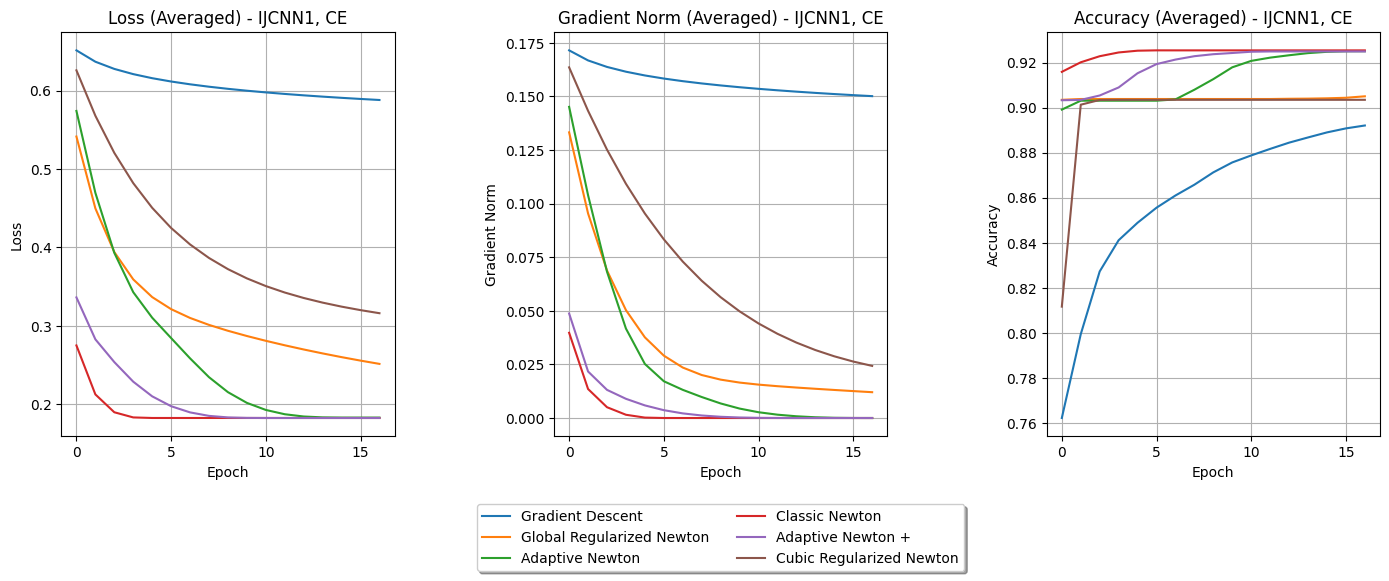

Average execution time(s): [0.14321582 0.18944772 0.27439833 0.19319844 0.27573029 0.22383626]
Average test accuracy(ies): [0.89235611 0.90147757 0.92446791 0.92361444 0.92422788 0.90134422]


In [13]:
print(all_execution_times)
print(len(all_gradient_norms))
generate_plots("IJCNN1", "CE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [14]:
epochs = 20
methods = ["gd", "grn", "adan", "adanp", "crn"] # Newton Fail
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "ijcnn1", epochs=17)


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 106.20it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 118.87it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 96.82it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 69.93it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 72.31it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 72.18it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 56.22it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 56.86it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 55.59it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 58.12it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 60.76it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 48.62it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 61.20it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 63.50it/s]


number of samples = 37492
x max/min: 1.0 -0.930435
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 17/17 [00:00<00:00, 71.42it/s]


5
5
gd found
grn found
adan found
adanp found
crn found


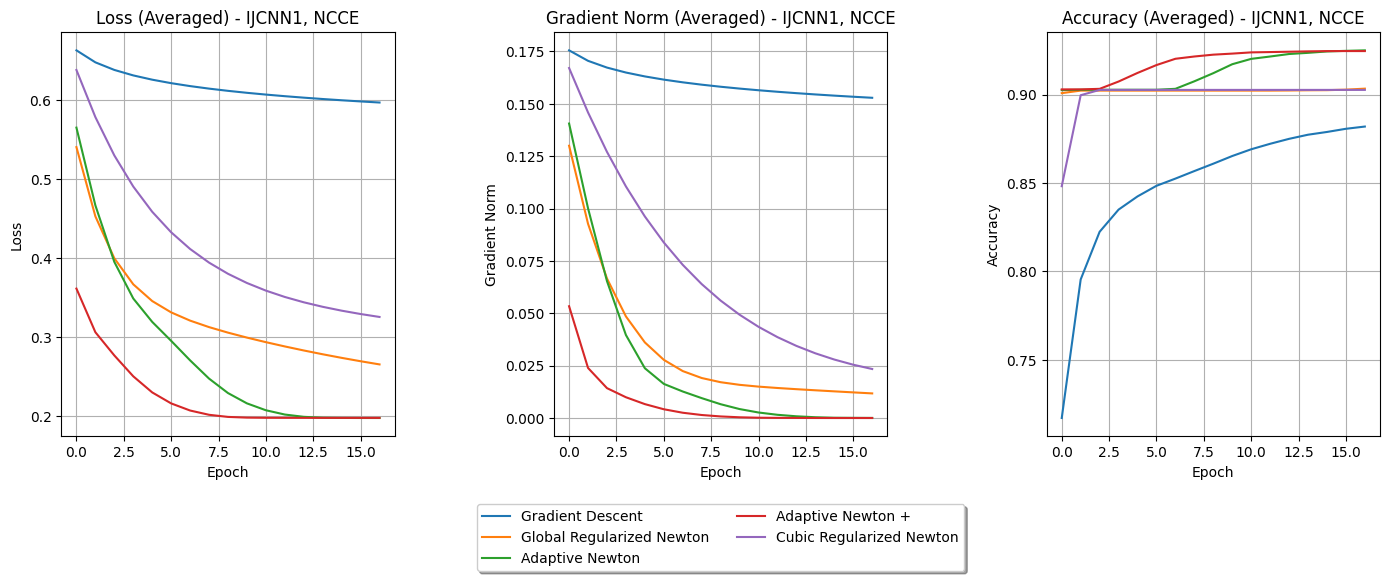

Average execution time(s): [0.16364368 0.24247583 0.30651744 0.31892339 0.26553814]
Average test accuracy(ies): [0.88248786 0.90587827 0.92417453 0.92390783 0.9037446 ]


In [15]:
print(len(all_execution_times))
print(len(all_gradient_norms))
generate_plots("IJCNN1", "NCCE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [16]:
epochs = 20
methods = ["gd", "grn", "adan", "adanp", "crn"] # newton failed
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ce", methods, "a9a", epochs=epochs)


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:00<00:00, 30.22it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:00<00:00, 26.37it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:00<00:00, 28.33it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:00<00:00, 20.84it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:00<00:00, 20.10it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:00<00:00, 21.12it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 14.38it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 14.55it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 14.56it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 14.65it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 14.66it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 14.52it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 18.81it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 18.66it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:01<00:00, 18.45it/s]


[[0.6697778701782227, 0.7645509243011475, 0.7124569416046143], [0.9658699035644531, 1.0011169910430908, 0.9538869857788086], [1.3974521160125732, 1.3801262378692627, 1.3797292709350586], [1.4023768901824951, 1.4011070728302002, 1.414154291152954], [1.0695230960845947, 1.0780892372131348, 1.0903611183166504]]
5
gd found
grn found
adan found
adanp found
crn found


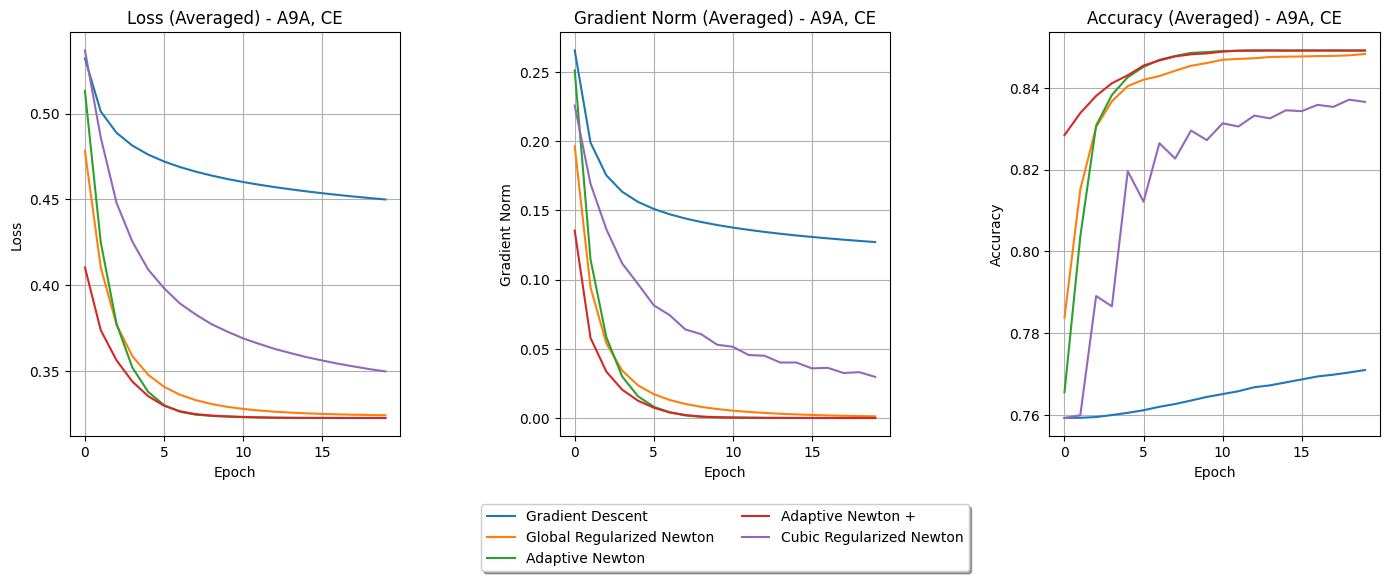

Average execution time(s): [0.71559525 0.97362463 1.38576921 1.40587942 1.07932448]
Average test accuracy(ies): [0.77480908 0.85101243 0.84994779 0.84994779 0.83866675]


In [17]:
print(all_execution_times)
print(len(all_gradient_norms))
generate_plots("A9A", "CE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [18]:
epochs = 15
methods = ["gd", "grn", "adan", "newton", "adanp", "crn"]
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "a9a", epochs=epochs)


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 30.27it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 30.82it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 31.87it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 20.82it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 20.66it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 21.49it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:01<00:00, 14.56it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:01<00:00, 14.28it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:01<00:00, 14.42it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 21.47it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 21.31it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 21.41it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:01<00:00, 14.72it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:01<00:00, 14.56it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:01<00:00, 14.53it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 18.99it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 18.88it/s]


number of samples = 32561
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 15/15 [00:00<00:00, 19.14it/s]


gd found
grn found
adan found
newton found
adanp found
crn found


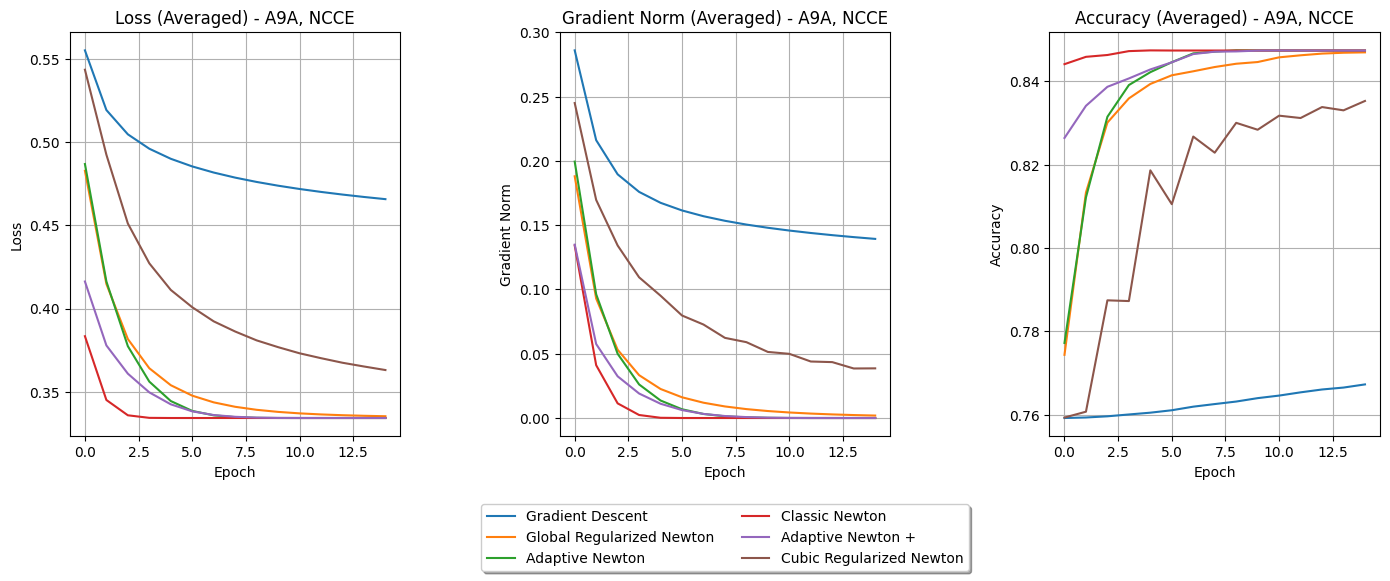

Average execution time(s): [0.49057078 0.72124322 1.04663467 0.70718209 1.06634569 0.79588675]
Average test accuracy(ies): [0.77145139 0.85219991 0.85129906 0.85129906 0.85129906 0.83676269]


In [19]:
generate_plots("A9A", "NCCE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [ ]:
epochs = 20
methods = ["grn", "adan", "adanp", "crn"] # Dont need GD and Newton
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ce", methods, "covtype", epochs=epochs)


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:11<00:00,  1.75it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:11<00:00,  1.79it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:10<00:00,  1.83it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:16<00:00,  1.24it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:16<00:00,  1.23it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:12<00:00,  1.62it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:12<00:00,  1.61it/s]


grn found
adan found
adanp found
crn found


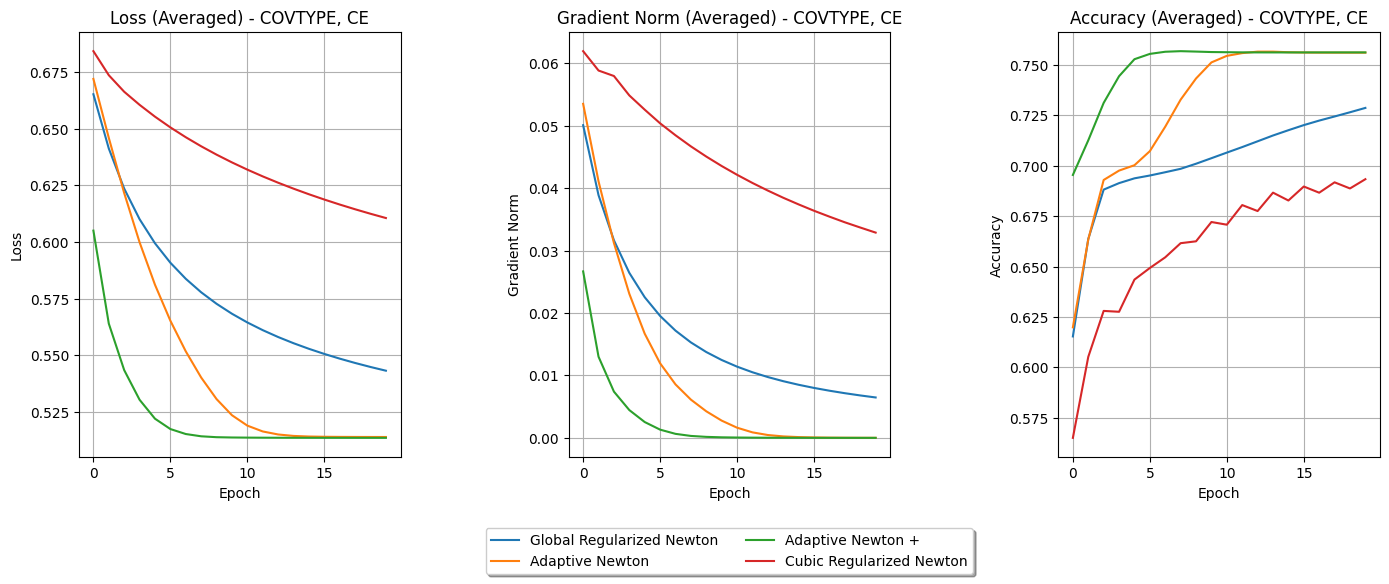

Average execution time(s): [11.22298996 16.72143237 16.94164968 12.55757769]
Average test accuracy(ies): [0.72958906 0.75672103 0.7565994  0.69392485]


In [21]:
generate_plots("COVTYPE", "CE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

In [22]:
epochs = 20
methods = ["grn", "adan", "adanp", "crn"] # Dont need GD and Newton
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "covtype", epochs=epochs)

number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:11<00:00,  1.73it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:11<00:00,  1.69it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:11<00:00,  1.76it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:16<00:00,  1.19it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:17<00:00,  1.16it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:12<00:00,  1.60it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:12<00:00,  1.57it/s]


number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs: 100%|██████████| 20/20 [00:11<00:00,  1.68it/s]


grn found
adan found
adanp found
crn found


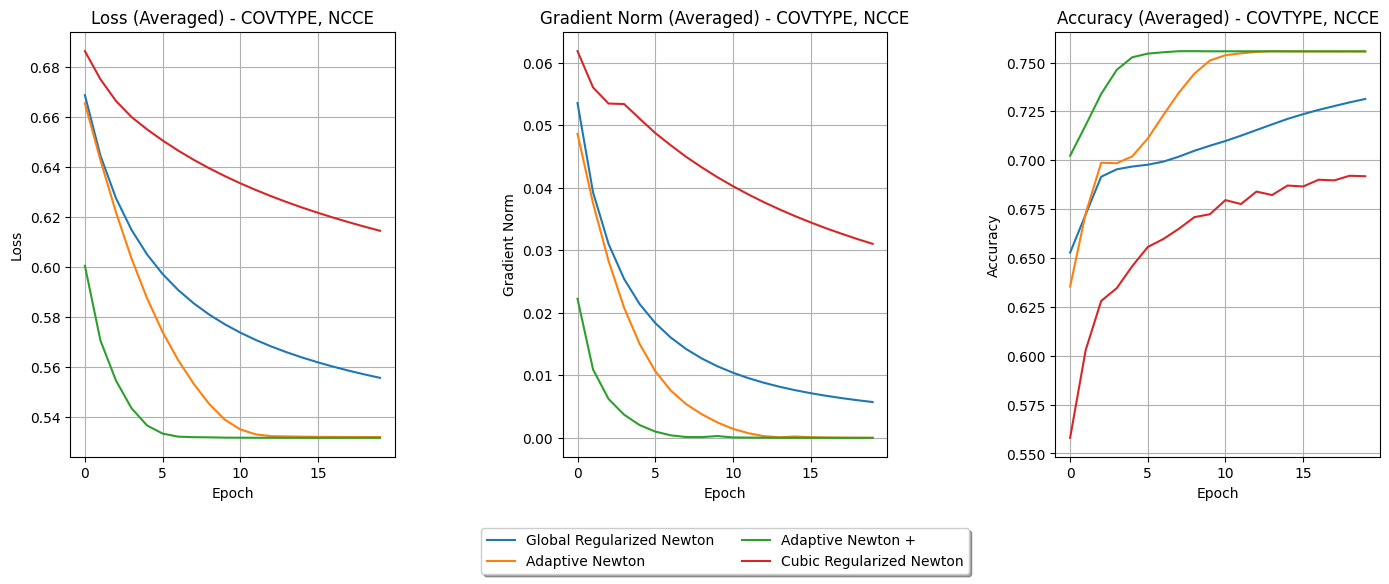

Average execution time(s): [11.6532023  17.29981494 17.521415   12.41739766]
Average test accuracy(ies): [0.73117021 0.75665448 0.75581457 0.69297479]


In [23]:
generate_plots("COVTYPE", "NCCE", methods)
print(f"Average execution time(s): {np.mean(np.array(all_execution_times), axis=1)}")
print(f"Average test accuracy(ies): {np.mean(np.array(all_test_accuracies), axis=1)}")

## Examining Individual Runs on "ugly" data

In [ ]:
number_of_runs_per_method = 1
epochs = 60
methods = ["grn", "adan", "adanp", "crn"] # Dont need GD and Newton
start_weights = np.random.randn(54) * 3
np.save("ugly1", start_weights)
all_execution_times, all_test_accuracies, all_gradient_norms, all_training_losses, all_training_accuracies = perform_runs("ncce", methods, "covtype", epochs=epochs, initial_w=start_weights)

number of samples = 435759
x max/min: 1.0 0.0
<class 'numpy.ndarray'>
Data sets have been loaded


Training Epochs:  37%|███▋      | 22/60 [00:12<00:21,  1.79it/s]

grn found
adan found
adanp found
crn found


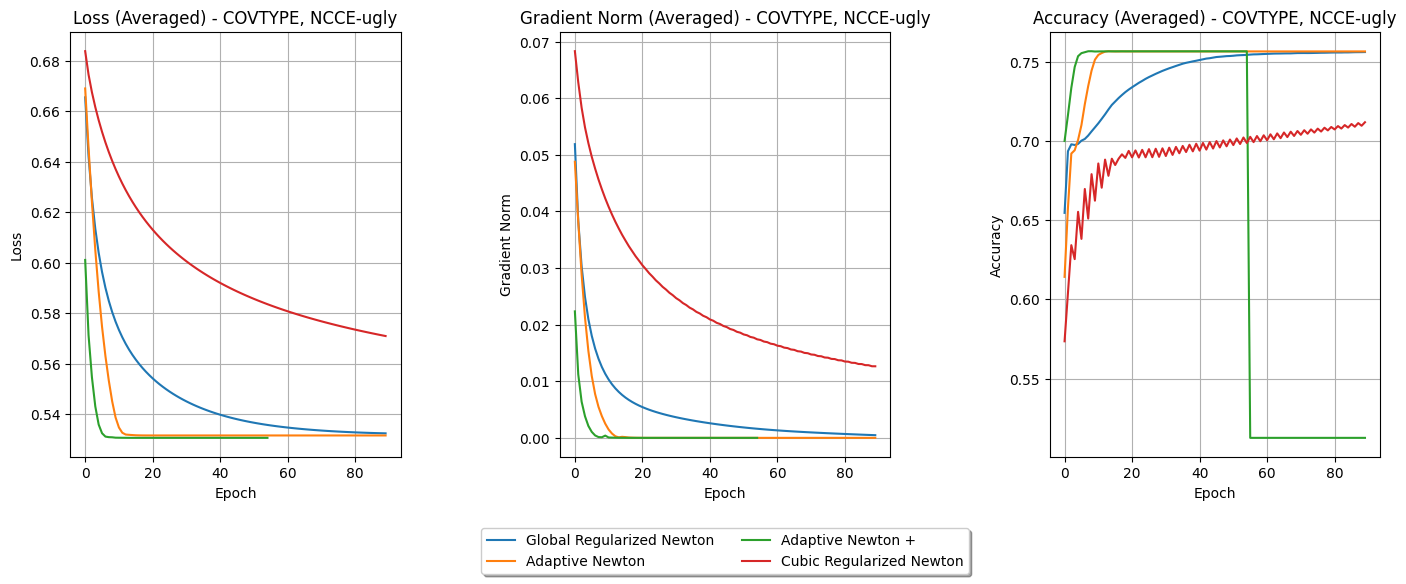

In [25]:
generate_plots("COVTYPE", "NCCE-ugly", methods)